# Results

Overall, the current benchmark show consistent results in the two datasets.
The trend of benchmaker metrics does not differ amongst the choice of atlases.
However, we can see variance within the parcellation scheme MIST and DiFuMo.
The variance comes from different resolution of the same parcellation scheme, epecially with low parcel counts.

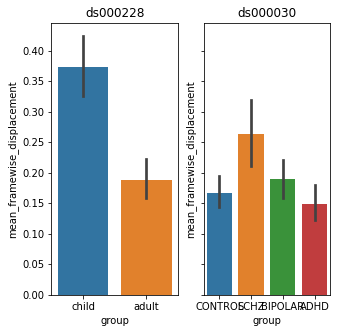

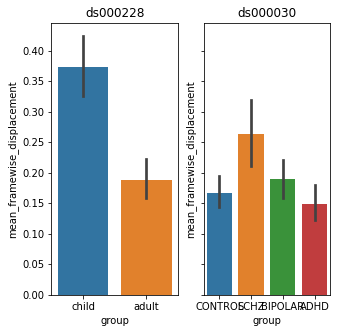

In [1]:
import warnings
warnings.filterwarnings("ignore")
from fmriprep_denoise.visualization import figures

from myst_nb import glue
fig = figures.plot_motion_overview()
glue("meanFD-fig", fig, display=False)

```{glue:figure} meanFD-fig
:figwidth: 800px
:name: "tbl:meanFD-fig"

Mean framewise displacement of each dataset. 
```

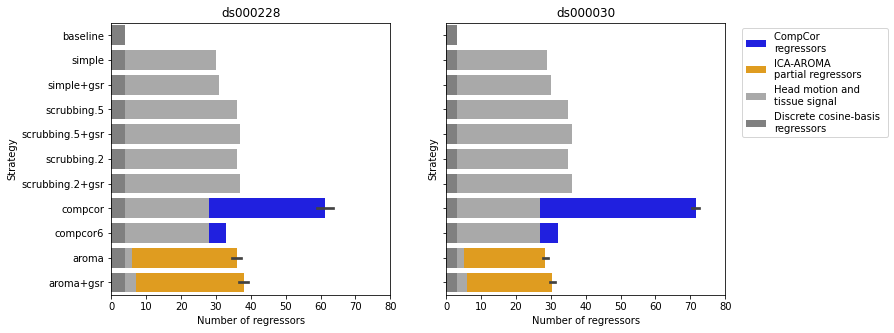

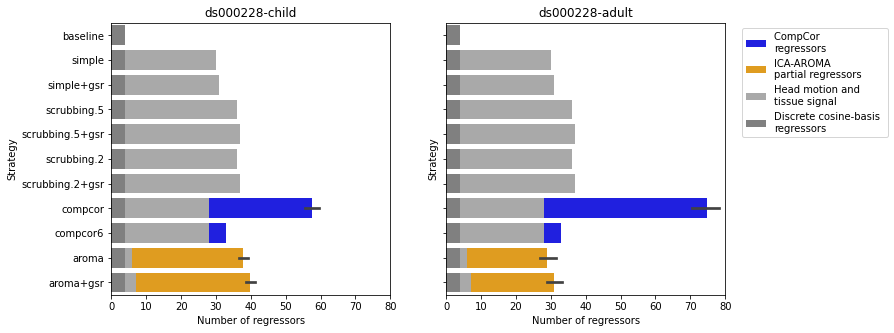

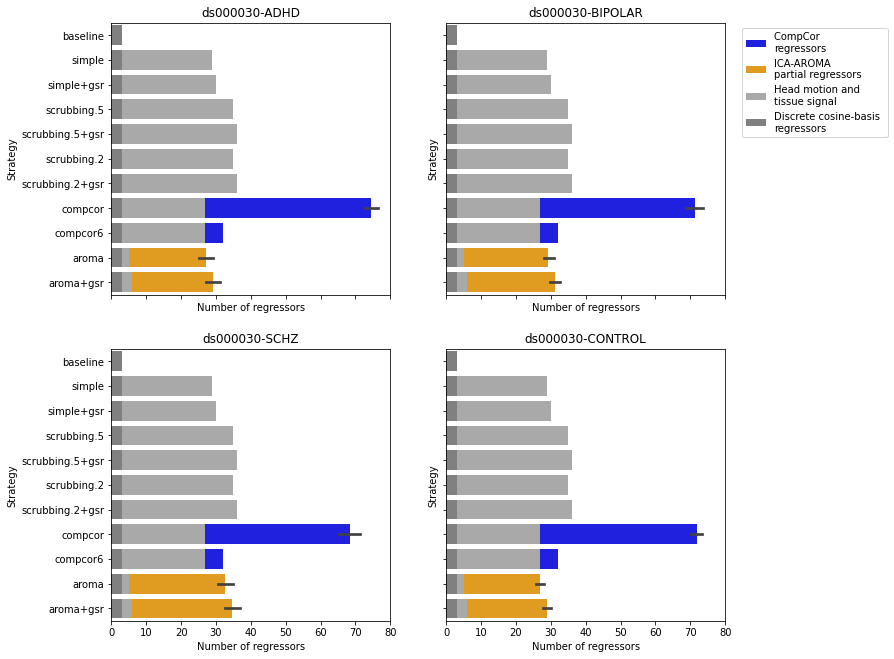

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


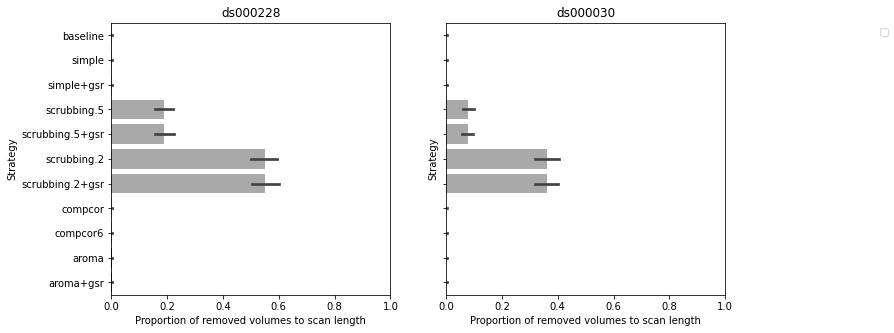

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


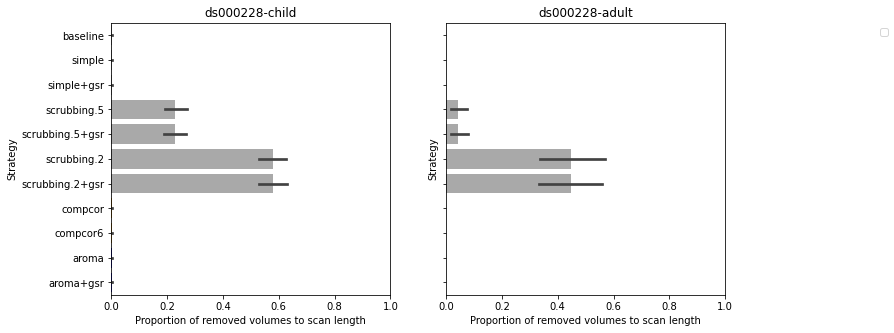

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


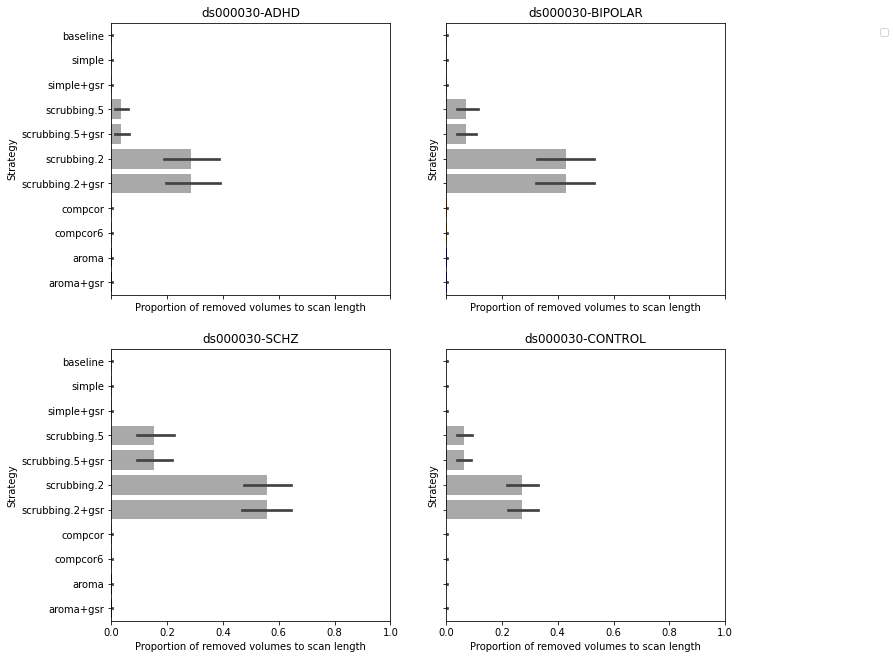

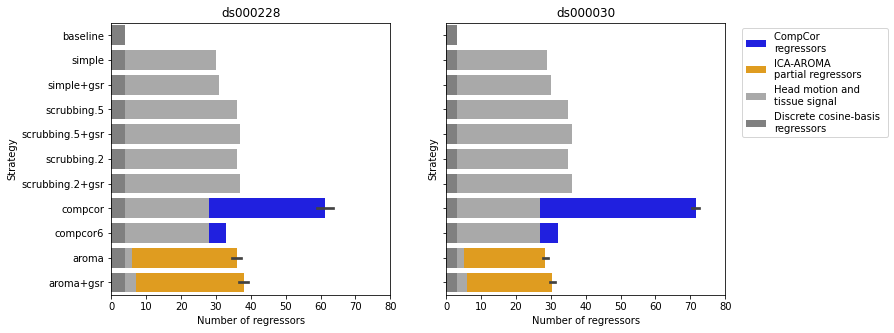

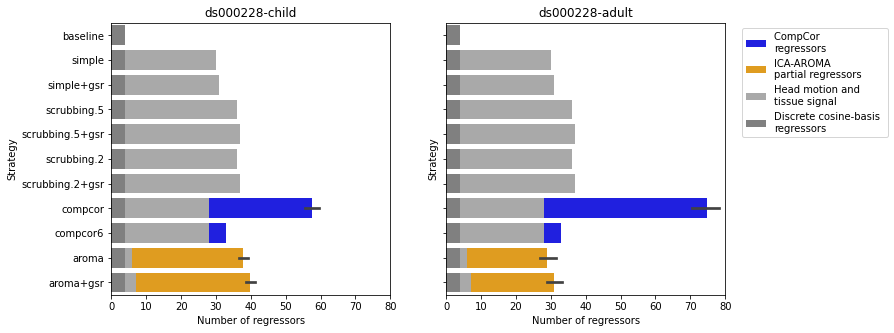

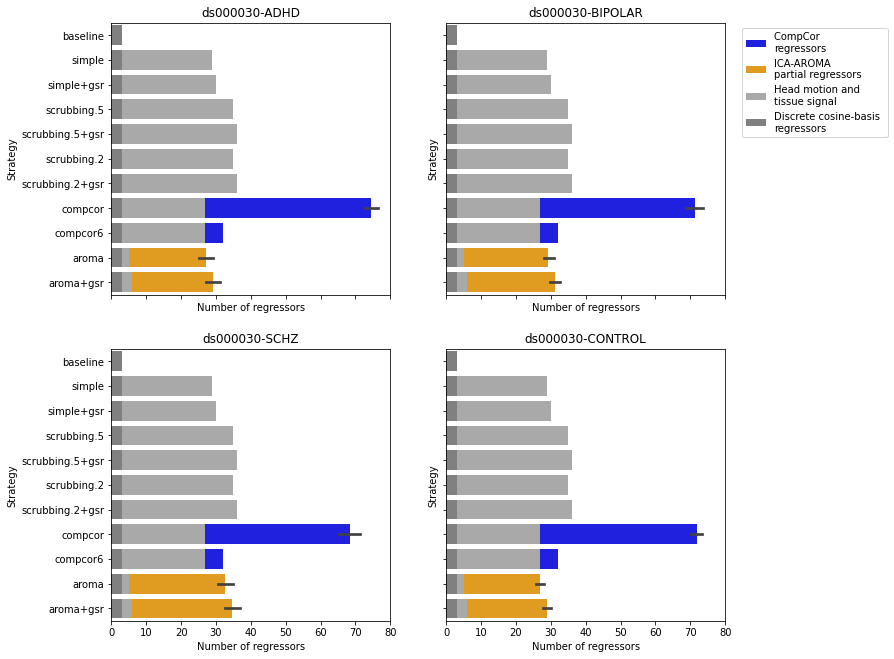

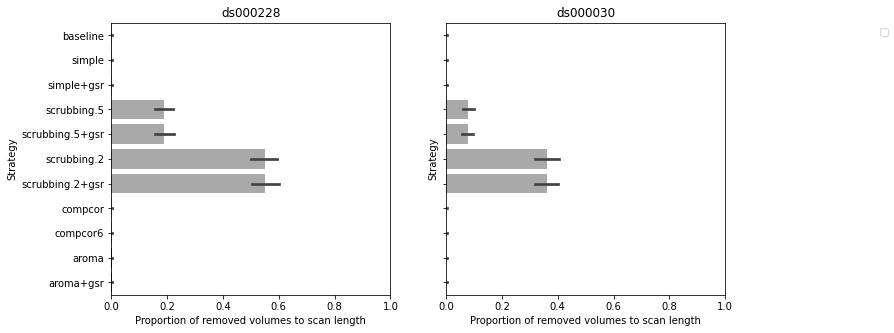

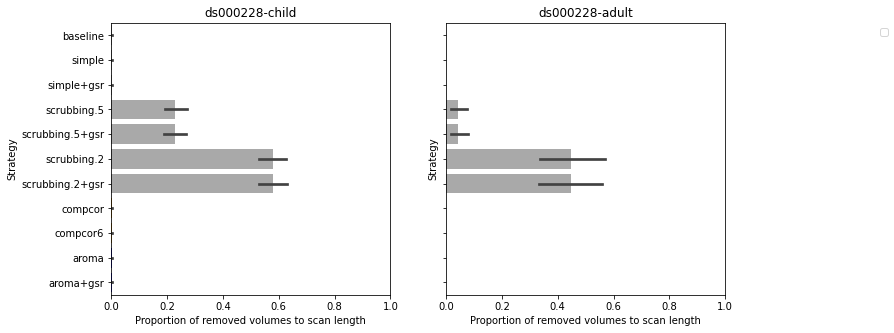

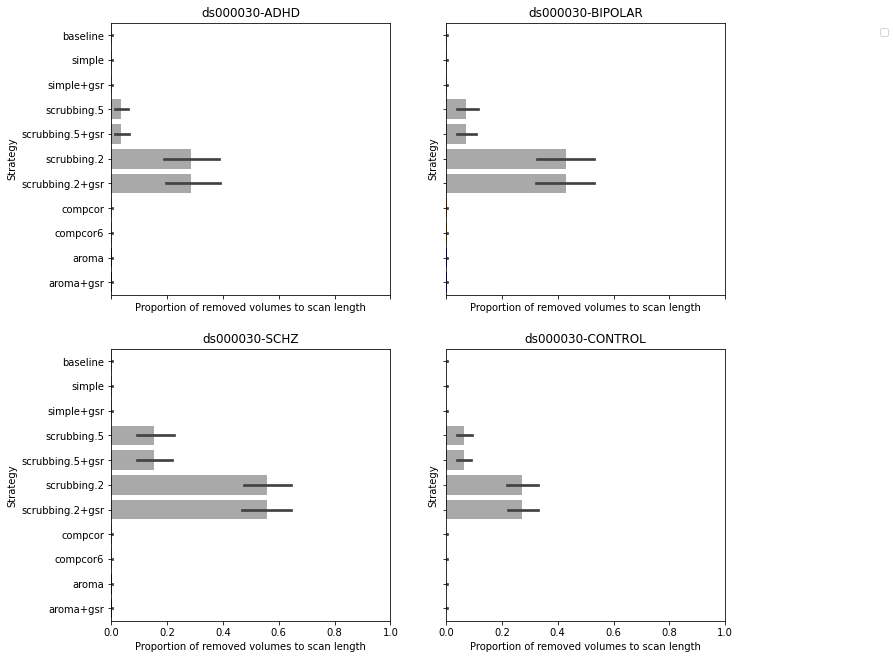

In [2]:
import warnings
warnings.filterwarnings("ignore")
from fmriprep_denoise.visualization import figures

from myst_nb import glue


plot_info = 'dof'

fig = figures.plot_dof_overview(plot_info)
glue("dof-fig", fig, display=False)

datasets = ["ds000228", "ds000030"]
for dataset in datasets:
    fig = figures.plot_dof_dataset(dataset, plot_info)
    glue(f"dof-{dataset}-fig", fig, display=False)

plot_info = 'scrubbing'

fig = figures.plot_dof_overview(plot_info)
glue("scrubbing-fig", fig, display=False)

datasets = ["ds000228", "ds000030"]
for dataset in datasets:
    fig = figures.plot_dof_dataset(dataset, plot_info)
    glue(f"scrubbing-{dataset}-fig", fig, display=False)

## The loss in temporal degrees of freedom in different strategies

When selecting denoising strategy, the loss in degrees of freedom `simple` and `simple+gsr` used the least amount of regressors. 
In {cite:t}`ciric_benchmarking_2017`, the equivalent `aroma` and `aroma+gsr` strategies were reported with a lower magnitude of loss in temporal degrees of freedom than `scrubbing` or `simple` strategies.
However, we did not obser this advantage in the two datasets shown in this benchmark. 
The reason potentially lies in the implementation of ICA-AROMA.
ICA-AROMA uses pretrained model on healthy subjects to select noise components {cite:p}`aroma`. 
The two datasets used in the current benchmark both contained subjects with behaviours deviating from the healthy controls. 
`ds000228` is comprised of adult healthy controls and children. 
`ds000030` includes healthy controls and subjects with three different psychiatric conditions. 

The figures showed the number of regressors used at different stage of denoising. 
The `simple` and `srubbing`-based strategy and `compcor6` are the strategy with a fixed number of degree of freedom loss.
`compcor` and `aroma`-based strategies shows variability depending on the number of noise compoenets detected.
We 

`````{tab-set}

````{tab-item} Overview
```{glue:figure} dof-fig
:figwidth: 800px
:name: "tbl:dof-fig"

Loss in temporal degrees of freedom in full sample of each dataset. 
```
````

````{tab-item} ds000228

```{glue:figure} dof-ds000228-fig
:figwidth: 800px
:name: "tbl:dof-ds000228-fig"

Loss in temporal degrees of freedom break down by groups. 
```
````

````{tab-item} ds000030
```{glue:figure} dof-ds000030-fig
:figwidth: 800px
:name: "tbl:dof-ds000030-fig"

Loss in temporal degrees of freedom break down by diagnostics. 
```
````

`````

To compare the loss in number of volumes from scrubbing base strategy across datasets, 
we calculate the proportion of volume loss to number of volumes in a full scan.
`ds000228` includes child subjects and shows higher loss in volumes comparing to `ds000030` with adult subjects only.
In `ds000228`, the trend of volume scrubbed comparing adults and children fits the observation shown in literature {cite:p}`satterthwaite_impact_2012`. 
In `ds000030`, the schizophrania group shows the highest amount of volumes scrubbed, followed by the biolar group, and comparable results betwee the control group and ADHD group.
With a stringent 0.2 mm threashold, groups with high motion 

<!-- The figure below can be further trimmed down. -->

`````{tab-set}

````{tab-item} Overview
```{glue:figure} scrubbing-fig
:figwidth: 800px
:name: "tbl:scrubbing-fig"

Loss in number of volumes in full sample of each dataset. 
```
````

````{tab-item} ds000228

```{glue:figure} scrubbing-ds000228-fig
:figwidth: 800px
:name: "tbl:scrubbing-ds000228-fig"

Loss in temporal degrees of freedom break down by groups. 
```
````

````{tab-item} ds000030
```{glue:figure} scrubbing-ds000030-fig
:figwidth: 800px
:name: "tbl:scrubbing-ds000030-fig"

Loss in number of volumes break down by diagnostics. 
```
````

`````

<!-- new analysis: direct compare mean FD between different groups -->